### News classification

Example taken from _Deep Learning with Python_ by François Chollet

In [7]:
# --------------------------------------------------------------------
# hack to avoid SSL download error
# --------------------------------------------------------------------
import os
import ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
        getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context
# --------------------------------------------------------------------

Import keras and the _Reuters_ dataset

In [8]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print('train data: ' + str(len(train_data)))
print('test data: ' + str(len(test_data)))

train data: 8982
test data: 2246


Convert data to vectors ready for Keras

In [9]:
import numpy as np 

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Create one-hot categorical encoding

In [10]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Set up the layers

In [11]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(46, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Compile

In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Set up training and validation data

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Train and save history

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=516,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 138us/step - loss: 2.8045 - acc: 0.5049 - val_loss: 1.9820 - val_acc: 0.6150
Epoch 2/20
7982/7982 [==============================] - 1s 84us/step - loss: 1.6664 - acc: 0.6666 - val_loss: 1.5066 - val_acc: 0.6720
Epoch 3/20
7982/7982 [==============================] - 1s 85us/step - loss: 1.2760 - acc: 0.7294 - val_loss: 1.2928 - val_acc: 0.7310
Epoch 4/20
7982/7982 [==============================] - 1s 84us/step - loss: 1.0382 - acc: 0.7775 - val_loss: 1.1637 - val_acc: 0.7480
Epoch 5/20
7982/7982 [==============================] - 1s 84us/step - loss: 0.8583 - acc: 0.8165 - val_loss: 1.0743 - val_acc: 0.7710
Epoch 6/20
7982/7982 [==============================] - 1s 85us/step - loss: 0.7131 - acc: 0.8514 - val_loss: 1.0108 - val_acc: 0.7970
Epoch 7/20
7982/7982 [==============================] - 1s 86us/step - loss: 0.5942 - acc: 0.8781 - val_loss: 0.9716 - val_acc: 0.8040
Epoch 

Generate loss plot 

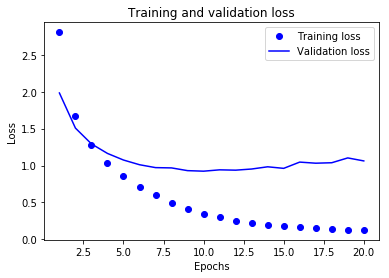

In [17]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Generate accuracy plot

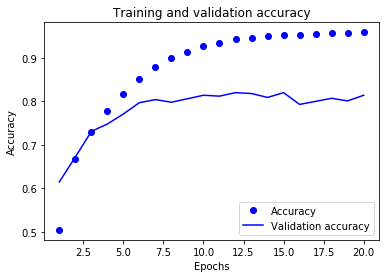

In [20]:
plt.clf()

accuracy = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, accuracy, 'bo', label='Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()